In [1]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Ref-Seq assembly data

In [2]:
k_array = np.arange(10, 23)

In [3]:
!ls ~/big_graph/refseq_k10/graph_refseq_k10.dbg

/cluster/home/mikhaika/big_graph/refseq_k10/graph_refseq_k10.dbg


In [4]:
import os

sizes = [os.path.getsize('../big_graph/refseq_k{}/graph_refseq_k{}.dbg'.format(x, x)) for x in k_array]
sizes

[5017397,
 19957085,
 79716413,
 318783677,
 1275200189,
 5100406198,
 20193422370,
 70555357553,
 180029209052,
 320880966947,
 424795775328,
 470859116657,
 490467611111]

In [5]:
num_edges = [4194305,
16777217,
67108865,
268435457,
1073741825,
4294807964,
17004180213,
58827897766,
147478598494,
261992234631,
355110450523,
411025684461,
441788978532,
]

In [6]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='sans-serif')#, serif='Times')
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=11)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
'text.usetex': True,
#'font.size': 15,
'text.latex.unicode': True
}
plt.rcParams.update(params)

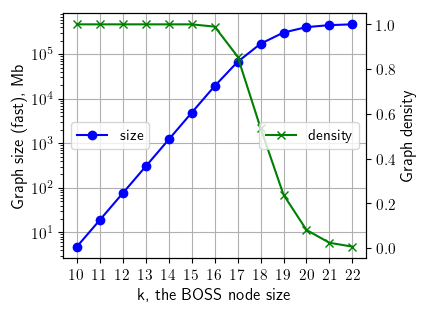

In [7]:
width = 3.487 * 1.5
height = width / 1.618

fig, ax = plt.subplots(1, 1, figsize=(width / 1.2, height))
#ax.set_title('RefSeq graph, with replaced \'N\'s')
#ax.set_title('RefSeq assembly graph')

ax.plot(np.array(k_array), np.array(sizes) / 2**20, marker='o', label='size', c='b')
ax.set_yscale('log')
ax.set_ylabel('Graph size (fast), Mb')
ax.set_xlabel('k, the BOSS node size')
ax.set_xticks(np.array(k_array))
ax.grid(True)
ax.legend(loc='center left')

ax2 = ax.twinx()
ax2.plot(np.array(k_array), num_edges / 4 ** (np.array(k_array) + 1), marker='x', label='density', c='g')
#ax2.set_yscale('log')
ax2.set_ylabel('Graph density')
ax2.legend(loc='center right')

plt.tight_layout()
plt.savefig('refseq_scalability.pdf', format='pdf', bbox_inches='tight')
plt.show()